# Exploratory Analysis of Body Fat Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('BodyFat.csv')
df

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,1,12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,2,6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,3,24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,4,10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,5,27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,248,11.5,1.0736,70,134.25,67.00,21.1,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,249,32.3,1.0236,72,201.00,69.75,29.1,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,250,28.3,1.0328,72,186.75,66.00,30.2,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,251,25.3,1.0399,72,190.75,70.50,27.0,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


<AxesSubplot: >

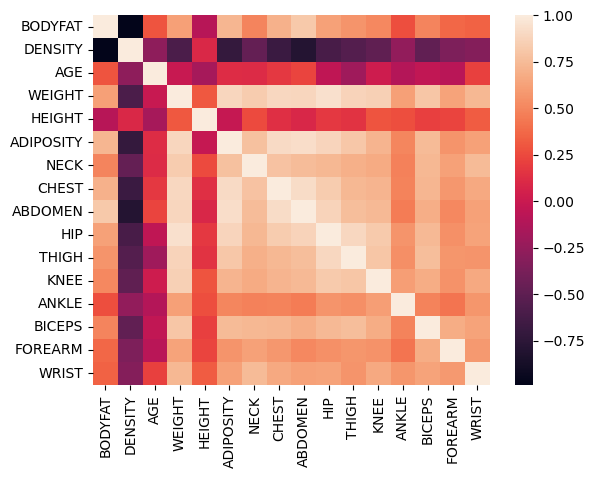

In [3]:
sns.heatmap(df.iloc[:, 1:len(df.columns)].corr(numeric_only=True))

<Figure size 5000x5000 with 0 Axes>

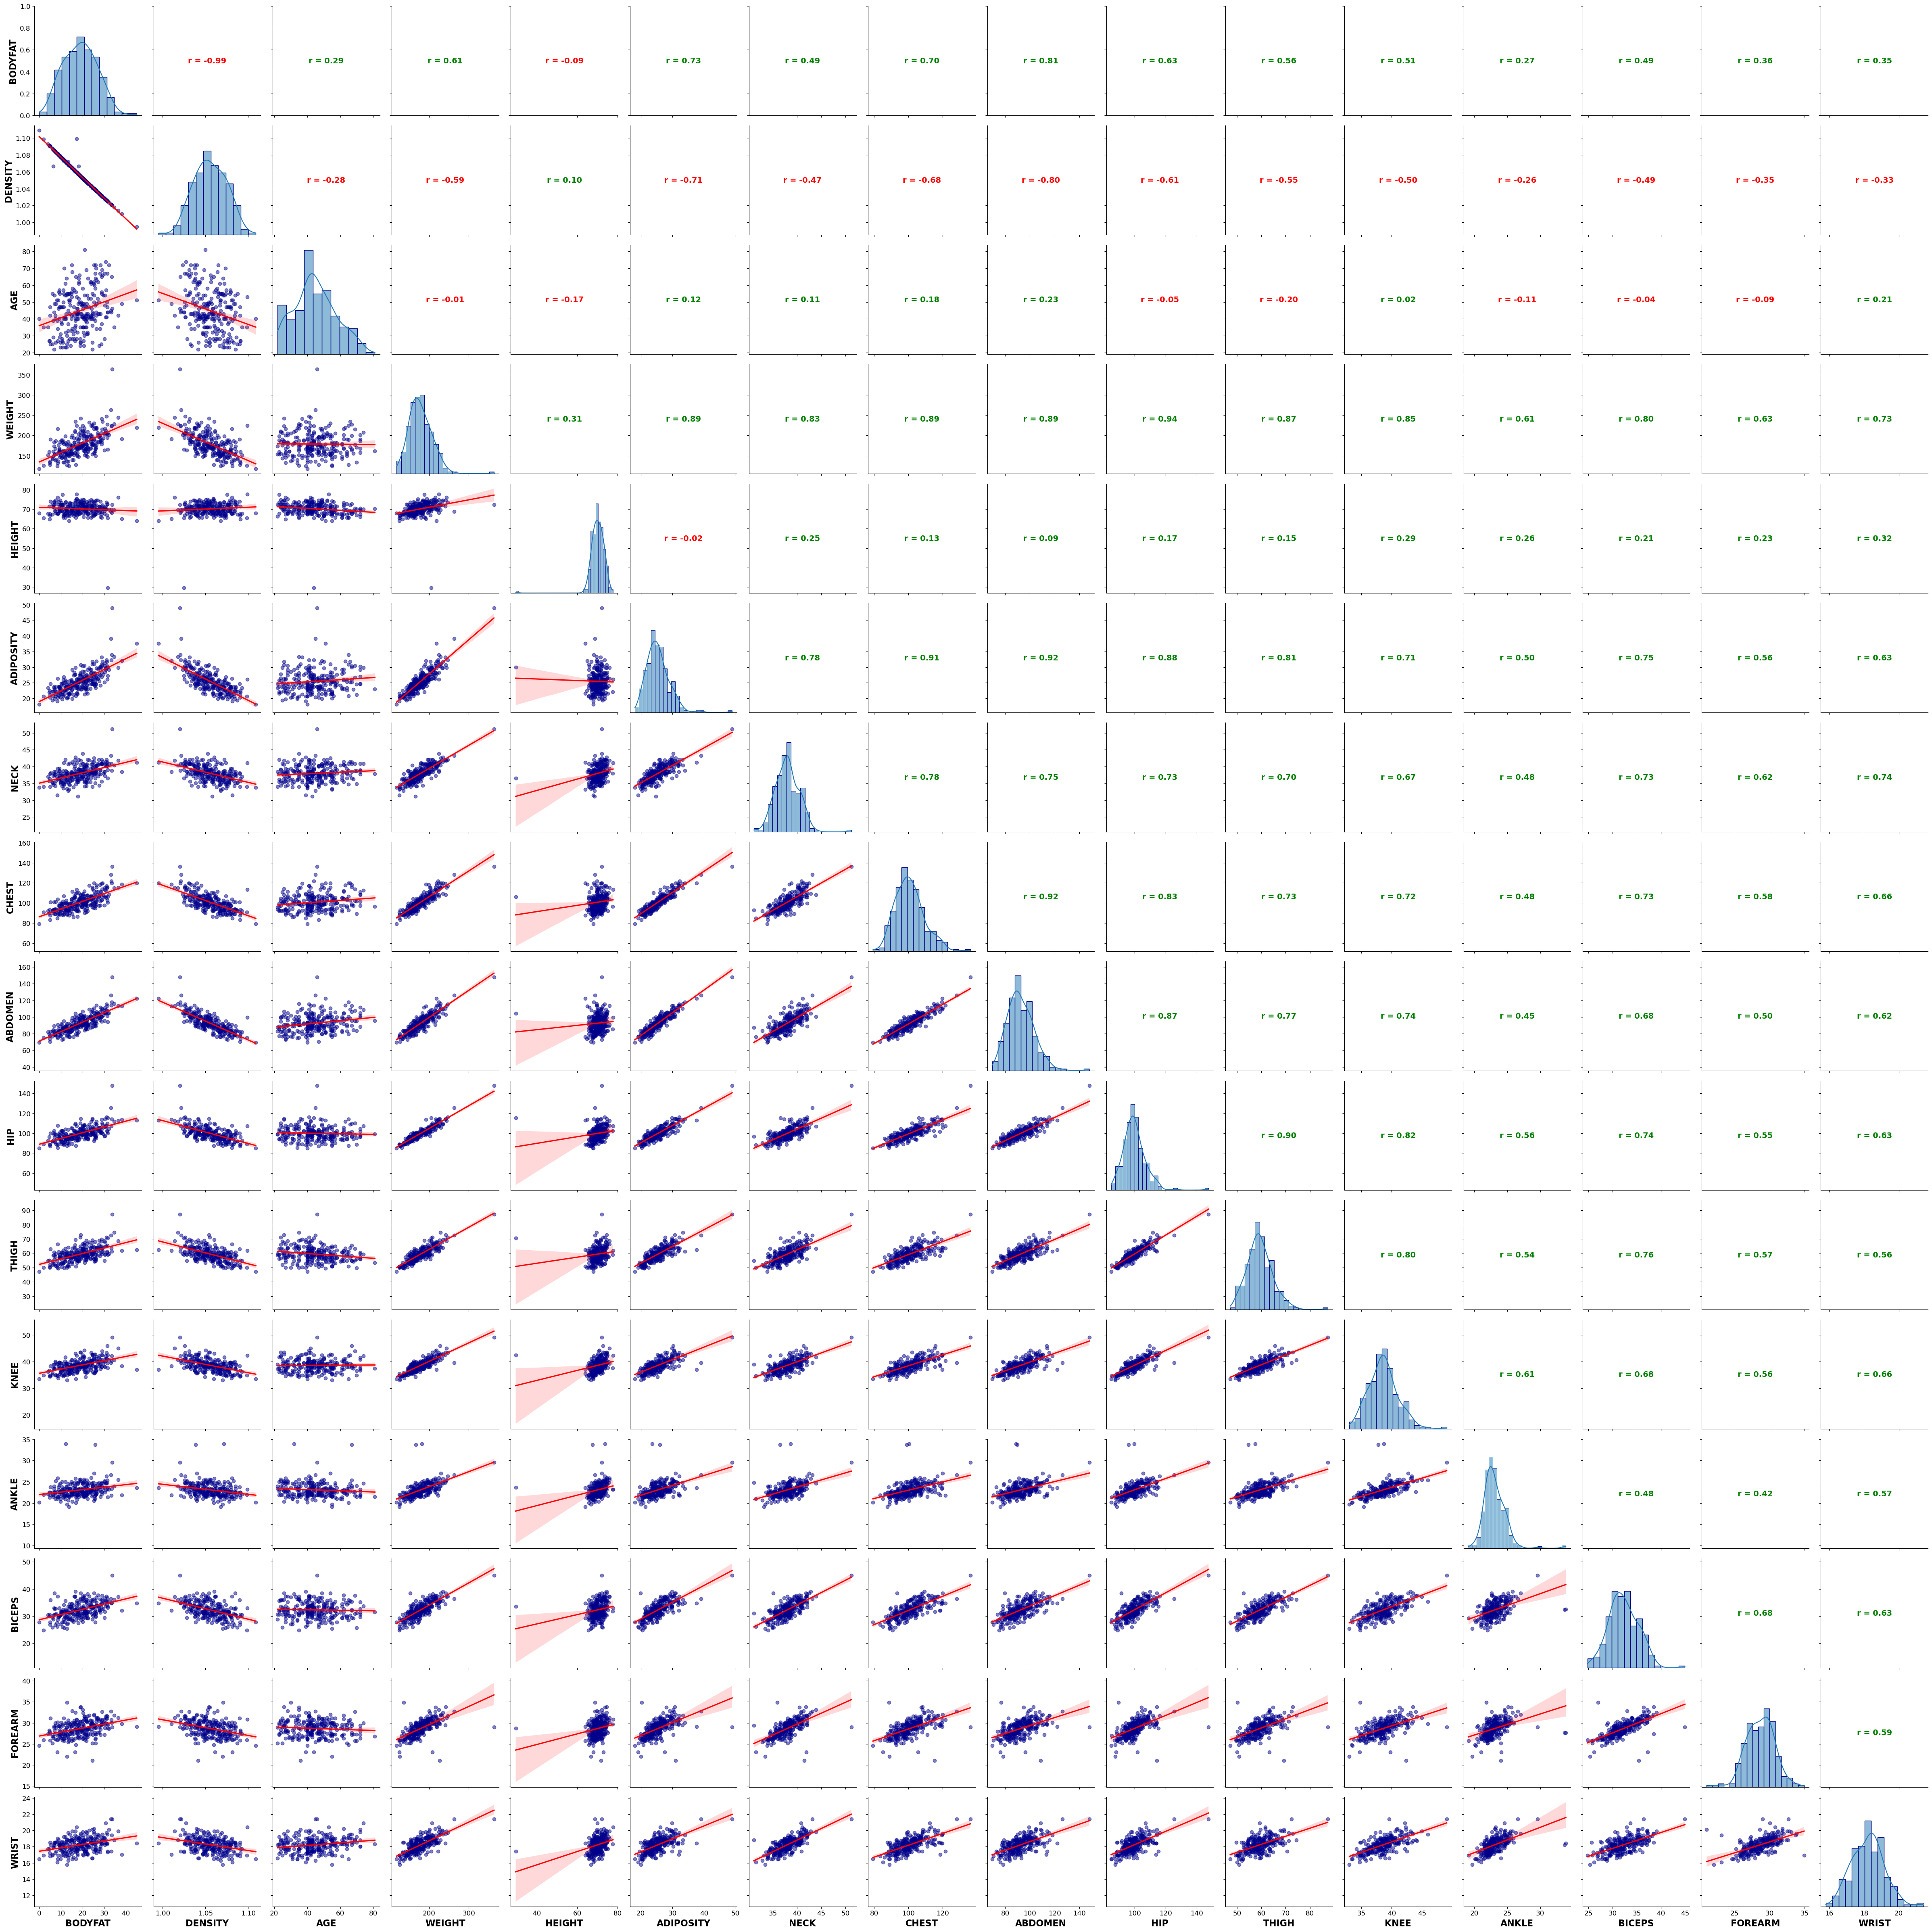

In [4]:
# Assuming df is your DataFrame
plt.figure(figsize=(50, 50))

# Create PairGrid with larger font size
g = sns.PairGrid(df.iloc[:, 1:len(df.columns)], height=3)

# Diagonal: Histogram with KDE
def hist_with_kde(x, **kwargs):
    color = kwargs.pop('color', 'skyblue')
    sns.histplot(x, kde=True, color=color, edgecolor='navy', **kwargs)

g.map_diag(hist_with_kde)

# Lower triangle: Scatterplot with regression line
g.map_lower(sns.regplot, scatter_kws={'alpha': 0.5, 'color': 'darkblue'}, 
            line_kws={'color': 'red'})

# Upper triangle: Correlation values
def corr(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    color = 'green' if r > 0 else 'red'
    ax.annotate(f'r = {r:.2f}', xy=(.5, .5), xycoords=ax.transAxes,
                ha='center', va='center', fontsize=14, fontweight='bold', color=color)

g.map_upper(corr)

# Adjust label font size and make bold
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=16, fontweight='bold')
    ax.set_ylabel(ax.get_ylabel(), fontsize=16, fontweight='bold')
    ax.tick_params(labelsize=12)

# Adjust layout
plt.tight_layout()

plt.show()